In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import requests
import json
from scipy import stats
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib inline

In [2]:
datasource = 'https://github.com/CSSEGISandData/COVID-19.git'
testsource = 'https://covidtracking.com/api/states/daily'
nation = 'US'
series = 'Confirmed'

In [3]:
covid19_dir = os.path.join(
    os.environ['HOME'],
    'Covid-19',
    'COVID-19'
)
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
)
[
    covid19_dir,
    ts_file
]

['/home/leon/Covid-19/COVID-19',
 '/home/leon/Covid-19/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv']

In [4]:
def run(cmd):
    result = subprocess.run(cmd, capture_output=True)
    if result.stdout:
        print('\nStdout:\n', 
              result.stdout.decode(), 
              '\n')
    if result.stderr:
        print('\nStderr:\n', 
              result.stderr.decode(), 
              '\n')
    return result

In [5]:
os.chdir(covid19_dir)
[
    run(['git', 'remote','-v', 'add', 'CSSEGISandData', datasource]),
    run(['git', 'fetch','-v', 'CSSEGISandData']),
    run(['git', 'merge', '-v', 'CSSEGISandData/master'])
]


Stderr:
 fatal: remote CSSEGISandData already exists.
 


Stderr:
 From https://github.com/CSSEGISandData/COVID-19
 = [up to date]      master     -> CSSEGISandData/master
 = [up to date]      web-data   -> CSSEGISandData/web-data
 


Stdout:
 Already up to date.
 



[CompletedProcess(args=['git', 'remote', '-v', 'add', 'CSSEGISandData', 'https://github.com/CSSEGISandData/COVID-19.git'], returncode=128, stdout=b'', stderr=b'fatal: remote CSSEGISandData already exists.\n'),
 CompletedProcess(args=['git', 'fetch', '-v', 'CSSEGISandData'], returncode=0, stdout=b'', stderr=b'From https://github.com/CSSEGISandData/COVID-19\n = [up to date]      master     -> CSSEGISandData/master\n = [up to date]      web-data   -> CSSEGISandData/web-data\n'),
 CompletedProcess(args=['git', 'merge', '-v', 'CSSEGISandData/master'], returncode=0, stdout=b'Already up to date.\n', stderr=b'')]

In [6]:
ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
ts_frame

Province/State Country/Region      Lat      Long  1/22/20  \
0                      NaN       Thailand  15.0000  101.0000        2   
1                      NaN          Japan  36.0000  138.0000        2   
2                      NaN      Singapore   1.2833  103.8333        0   
3                      NaN          Nepal  28.1667   84.2500        0   
4                      NaN       Malaysia   2.5000  112.5000        0   
..                     ...            ...      ...       ...      ...   
477  Northwest Territories         Canada  64.8255 -124.8457        0   
478                    NaN     Cape Verde  15.1111  -23.6167        0   
479                    NaN     East Timor  -8.5500  125.5600        0   
480                    NaN        Eritrea  15.1794   39.7823        0   
481                    NaN         Uganda   1.0000   32.0000        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/12/20  3/13/20  \
0          3        5        7        8        8  ...       70       75   
1          1        2        2        4        4  ...      639      701   
2          1        3        3        4        5  ...      178      200   
3          0        0        1        1        1  ...        1        1   
4          0        0        3        4        4  ...      149      197   
..       ...      ...      ...      ...      ...  ...      ...      ...   
477        0        0        0        0        0  ...        0        0   
478        0        0        0        0        0  ...        0        0   
479        0        0        0        0        0  ...        0        0   
480        0        0        0        0        0  ...        0        0   
481        0        0        0        0        0  ...        0        0   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  
0         82      114      147      177      212      272      322      411  
1        773      839      825      878      889      924      963     1007  
2        212      226      243      266      313      345      385      432  
3          1        1        1        1        1        1        1        1  
4        238      428      566      673      790      900     1030     1183  
..       ...      ...      ...      ...      ...      ...      ...      ...  
477        0        0        0        0        0        0        0        1  
478        0        0        0        0        0        0        0        1  
479        0        0        0        0        0        0        0        1  
480        0        0        0        0        0        0        0        1  
481        0        0        0        0        0        0        0        1  

[482 rows x 64 columns]

In [7]:
nations = np.unique(np.array(ts_frame.loc[:,'Country/Region']))

In [8]:
nationrows = ts_frame.loc[:, 'Country/Region'] == nation
nationrows

0      False
1      False
2      False
3      False
4      False
       ...  
477    False
478    False
479    False
480    False
481    False
Name: Country/Region, Length: 482, dtype: bool

In [9]:
nation_frame = ts_frame[nationrows]
nation_frame

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
98         Washington             US  47.4009 -121.4905        0        0   
99           New York             US  42.1657  -74.9481        0        0   
100        California             US  36.1162 -119.6816        0        0   
101     Massachusetts             US  42.2302  -71.5301        0        0   
102  Diamond Princess             US  35.4437  139.6380        0        0   
..                ...            ...      ...       ...      ...      ...   
399    New Castle, DE             US  39.5393  -75.6674        0        0   
414           Alabama             US  32.3182  -86.9023        0        0   
417       Puerto Rico             US  18.2208  -66.5901        0        0   
431              Guam             US  13.4443  144.7937        0        0   
448    Virgin Islands             US  18.3358  -64.8963        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/12/20  3/13/20  3/14/20  \
98         0        0        0        0  ...      442      568      572   
99         0        0        0        0  ...      328      421      525   
100        0        0        0        0  ...      221      282      340   
101        0        0        0        0  ...      108      123      138   
102        0        0        0        0  ...       46       46       46   
..       ...      ...      ...      ...  ...      ...      ...      ...   
399        0        0        0        0  ...        0        0        0   
414        0        0        0        0  ...        0        5        6   
417        0        0        0        0  ...        0        0        3   
431        0        0        0        0  ...        0        0        0   
448        0        0        0        0  ...        0        0        1   

     3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  
98       643      904     1076     1014     1376     1524     1793  
99       732      967     1706     2495     5365     8310    11710  
100      426      557      698      751      952     1177     1364  
101      164      197      218      218      328      413      525  
102       46       47       47       47       47       49       49  
..       ...      ...      ...      ...      ...      ...      ...  
399        0        0        0        0        0        0        0  
414       12       29       39       46       78       83      131  
417        5        5        5        5        5       14       21  
431        3        3        3        5       12       14       15  
448        1        1        2        2        3        3        3  

[247 rows x 64 columns]

In [10]:
nation_frame.aggregate(np.sum)

Province/State    WashingtonNew YorkCaliforniaMassachusettsDiamo...
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Lat                                                            9531
Long                                                       -22951.8
1/22/20                                                           1
                                        ...                        
3/17/20                                                        6421
3/18/20                                                        7783
3/19/20                                                       13677
3/20/20                                                       19100
3/21/20                                                       25489
Length: 64, dtype: object

In [11]:
nation_series = nation_frame.agg(np.sum)[4:]
[
    type(nation_series),
    nation_series
]

[pandas.core.series.Series,
 1/22/20        1
 1/23/20        1
 1/24/20        2
 1/25/20        2
 1/26/20        5
 1/27/20        5
 1/28/20        5
 1/29/20        5
 1/30/20        5
 1/31/20        7
 2/1/20         8
 2/2/20         8
 2/3/20        11
 2/4/20        11
 2/5/20        11
 2/6/20        11
 2/7/20        11
 2/8/20        11
 2/9/20        11
 2/10/20       11
 2/11/20       12
 2/12/20       12
 2/13/20       13
 2/14/20       13
 2/15/20       13
 2/16/20       13
 2/17/20       13
 2/18/20       13
 2/19/20       13
 2/20/20       13
 2/21/20       15
 2/22/20       15
 2/23/20       15
 2/24/20       51
 2/25/20       51
 2/26/20       57
 2/27/20       58
 2/28/20       60
 2/29/20       68
 3/1/20        74
 3/2/20        98
 3/3/20       118
 3/4/20       149
 3/5/20       217
 3/6/20       262
 3/7/20       402
 3/8/20       518
 3/9/20       583
 3/10/20      959
 3/11/20     1281
 3/12/20     1663
 3/13/20     2179
 3/14/20     2727
 3/15/20     3499


In [12]:
np.array(nation_series[-4:])/nation_series[-5:-1]

3/17/20    1.21212
3/18/20    1.75729
3/19/20    1.39651
3/20/20     1.3345
dtype: object

In [13]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[
    type(strdates),
    strdates,
    type(dates),
    dates,
    np.array(nation_series[:]),
    strdates[-1]
]

[pandas.core.indexes.base.Index,
 Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
        '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
        '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
        '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
        '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
        '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
        '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
        '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
        '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
        '3/19/20', '3/20/20', '3/21/20'],
       dtype='object'),
 list,
 [Timestamp('2020-01-22 00:00:00'),
  Timestamp('2020-01-23 00:00:00'),
  Timestamp('2020-01-24 00:00:00'),
  Timestamp('2020-01-25 00:00:00'),
  Timestamp('2020-01-26 00:00:00'),
  Timestamp('2020-01-27 00:00:00'

In [14]:
nations_widget = widgets.Dropdown(
    options = nations,
    value = nation,
    description = "Nation: "
)

In [15]:
# Load series into a dict of pandas dataframes
series_options = ['Confirmed','Deaths','Recovered']
#series_options = [re.match(r'time_series_19-covid-(.*).csv',file)[1] for file in os.listdir(os.path.join(
#    covid19_dir,
#    'csse_covid_19_data',
#    'csse_covid_19_time_series'))
#  if re.match(r'time_series_19-covid-(.*).csv',file)
#]
series_frames = dict();
for series_to_read in series_options:
  ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    f'time_series_19-covid-{series_to_read}.csv'    
  )
  series_frames[series_to_read] = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
    
series_frames.keys()

dict_keys(['Confirmed', 'Deaths', 'Recovered'])

In [16]:
nation_series_cache = dict()
def get_nation_series(nation,series):
  if nation in nation_series_cache and series in nation_series_cache[nation]:
    nation_series = nation_series_cache[nation][series]
  else:
    ts_frame = series_frames[series]
    nationrows = ts_frame.loc[:, 'Country/Region'] == nation
    nation_frame = ts_frame[nationrows]
    nation_series = nation_frame.agg(np.sum)[4:]
    if nation not in nation_series_cache:
        nation_series_cache[nation] = dict()
    nation_series_cache[nation][series] = nation_series

  strdates = nation_series.keys()
  dates = [pd.to_datetime(sd) for sd in strdates]

  return (nation_series,dates)

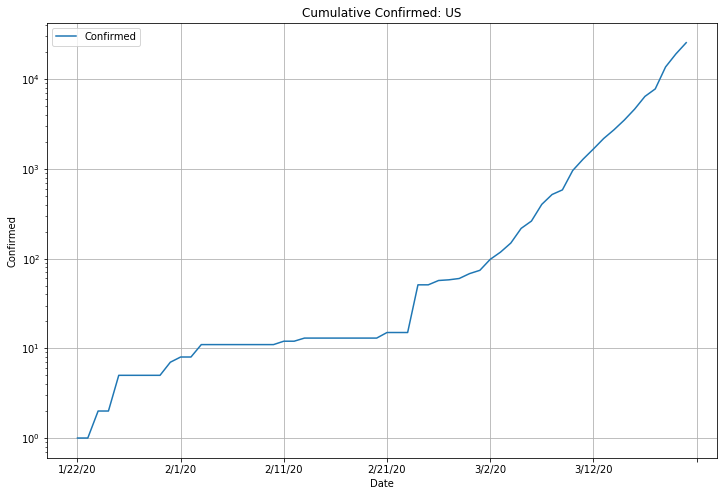

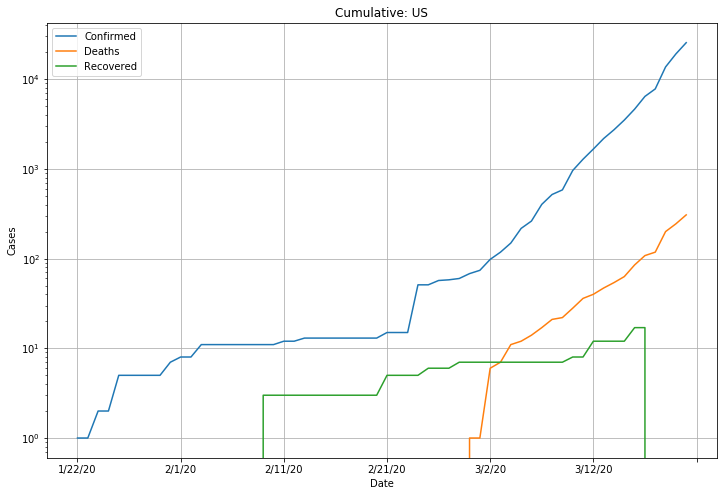

In [17]:
def plot_single_series(nation,series):
  nation_series, dates = get_nation_series(nation,series)
  nation_series.plot(
    x=dates,
    logy=True, 
    title='Cumulative {series}: {nation}'.format(series=series, nation=nation),
    grid=True,
    figsize=(12,8)
  )
  plt.grid(True)
  plt.ylabel(series)
  plt.xlabel('Date')
  plt.legend([series])

# Plot all the series
def plot_all_series(nation):
  for series in series_options:
    plot_single_series(nation,series)
  plt.ylabel('Cases')
  plt.legend(series_options)
  plt.title(f'Cumulative: {nation}')

plt.figure()
plot_single_series(nation,series)

plt.figure()
plot_all_series(nation)

In [18]:
interactive(plot_single_series,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=155, options=('Afghanistan', 'Albania', 'Algeria'…

In [19]:
def do_linear_regression(nation,series,n_points,days_back):
  nation_series, dates = get_nation_series(nation,series)
  days = np.arange(0,nation_series.shape[0])
  y = np.log10(np.float64(nation_series+1))
  if days_back >= 0:
    s = slice(-n_points,None)
  else:
    s = slice(-n_points+days_back,days_back)
  lr = stats.linregress(days[s],y[s])
  
  fig = plt.figure(figsize=(12,8))
  plt.plot(days,y)
  line = lr.slope*days[s]+lr.intercept
  plt.plot(days[s],line)
  plt.grid(True)

  plt.xlabel('Days')
  plt.ylabel('log10(Cases+1)')

  str = f"""Slope: {lr.slope:.3f}
Doubling time: {np.inf if lr.slope==0 else np.log10(2)/lr.slope:.3f} days
Daily increase: {(np.exp(lr.slope)-1)*100:2.0f}%"""

  plt.text(days[s][0]-25,line[0],str)

  return lr
    
interactive(do_linear_regression,
            nation=nations_widget,
            series=series_options,
            n_points=widgets.IntSlider(value=4,min=2,max=nation_series.shape[0]),
            days_back=widgets.IntSlider(value=0,min=-nation_series.shape[0],max=0)
           )

interactive(children=(Dropdown(description='Nation: ', index=155, options=('Afghanistan', 'Albania', 'Algeria'…

In [20]:
testresponse = requests.get(testsource)
testresponse

<Response [200]>

In [21]:
testresponse.json()

[{'date': 20200321,
  'state': 'AK',
  'positive': 14,
  'negative': 758,
  'pending': None,
  'hospitalized': 0,
  'death': None,
  'total': 772,
  'dateChecked': '2020-03-21T20:00:00Z'},
 {'date': 20200321,
  'state': 'AL',
  'positive': 124,
  'negative': 28,
  'pending': None,
  'hospitalized': None,
  'death': 0,
  'total': 152,
  'dateChecked': '2020-03-21T20:00:00Z'},
 {'date': 20200321,
  'state': 'AR',
  'positive': 118,
  'negative': 567,
  'pending': 154,
  'hospitalized': None,
  'death': None,
  'total': 839,
  'dateChecked': '2020-03-21T20:00:00Z'},
 {'date': 20200321,
  'state': 'AS',
  'positive': None,
  'negative': None,
  'pending': None,
  'hospitalized': None,
  'death': 0,
  'total': 0,
  'dateChecked': '2020-03-21T20:00:00Z'},
 {'date': 20200321,
  'state': 'AZ',
  'positive': 104,
  'negative': 240,
  'pending': 122,
  'hospitalized': None,
  'death': 1,
  'total': 466,
  'dateChecked': '2020-03-21T20:00:00Z'},
 {'date': 20200321,
  'state': 'CA',
  'positive': 

In [22]:
tests = pd.DataFrame(testresponse.json())
tests

date state  positive  negative  pending  hospitalized  death  total  \
0    20200321    AK      14.0     758.0      NaN           0.0    NaN    772   
1    20200321    AL     124.0      28.0      NaN           NaN    0.0    152   
2    20200321    AR     118.0     567.0    154.0           NaN    NaN    839   
3    20200321    AS       NaN       NaN      NaN           NaN    0.0      0   
4    20200321    AZ     104.0     240.0    122.0           NaN    1.0    466   
..        ...   ...       ...       ...      ...           ...    ...    ...   
864  20200304    OR       3.0      29.0     18.0           NaN    NaN     50   
865  20200304    SC       0.0       5.0      0.0           NaN    NaN      5   
866  20200304    TX       1.0       NaN      NaN           NaN    NaN      1   
867  20200304    WA      39.0       NaN      NaN           NaN    NaN     39   
868  20200304    WI       1.0      19.0      6.0           NaN    NaN     26   

              dateChecked  
0    2020-03-21T20:00:00Z  
1    2020-03-21T20:00:00Z  
2    2020-03-21T20:00:00Z  
3    2020-03-21T20:00:00Z  
4    2020-03-21T20:00:00Z  
..                    ...  
864  2020-03-04T21:00:00Z  
865  2020-03-04T21:00:00Z  
866  2020-03-04T21:00:00Z  
867  2020-03-04T21:00:00Z  
868  2020-03-04T21:00:00Z  

[869 rows x 9 columns]

In [23]:
tests['dateChecked'] = pd.to_datetime(tests['dateChecked'])
tests

date state  positive  negative  pending  hospitalized  death  total  \
0    20200321    AK      14.0     758.0      NaN           0.0    NaN    772   
1    20200321    AL     124.0      28.0      NaN           NaN    0.0    152   
2    20200321    AR     118.0     567.0    154.0           NaN    NaN    839   
3    20200321    AS       NaN       NaN      NaN           NaN    0.0      0   
4    20200321    AZ     104.0     240.0    122.0           NaN    1.0    466   
..        ...   ...       ...       ...      ...           ...    ...    ...   
864  20200304    OR       3.0      29.0     18.0           NaN    NaN     50   
865  20200304    SC       0.0       5.0      0.0           NaN    NaN      5   
866  20200304    TX       1.0       NaN      NaN           NaN    NaN      1   
867  20200304    WA      39.0       NaN      NaN           NaN    NaN     39   
868  20200304    WI       1.0      19.0      6.0           NaN    NaN     26   

                  dateChecked  
0   2020-03-21 20:00:00+00:00  
1   2020-03-21 20:00:00+00:00  
2   2020-03-21 20:00:00+00:00  
3   2020-03-21 20:00:00+00:00  
4   2020-03-21 20:00:00+00:00  
..                        ...  
864 2020-03-04 21:00:00+00:00  
865 2020-03-04 21:00:00+00:00  
866 2020-03-04 21:00:00+00:00  
867 2020-03-04 21:00:00+00:00  
868 2020-03-04 21:00:00+00:00  

[869 rows x 9 columns]

In [24]:
latest = tests.loc[tests.groupby('state').dateChecked.idxmax()]
latest

date state  positive  negative  pending  hospitalized  death  total  \
0   20200321    AK      14.0     758.0      NaN           0.0    NaN    772   
1   20200321    AL     124.0      28.0      NaN           NaN    0.0    152   
2   20200321    AR     118.0     567.0    154.0           NaN    NaN    839   
3   20200321    AS       NaN       NaN      NaN           NaN    0.0      0   
4   20200321    AZ     104.0     240.0    122.0           NaN    1.0    466   
5   20200321    CA    1279.0   11249.0      NaN           NaN   24.0  12528   
6   20200321    CO     363.0    3317.0      NaN          44.0    4.0   3680   
7   20200321    CT     194.0    2106.0      NaN           NaN    4.0   2300   
8   20200321    DC      77.0     506.0      0.0           NaN    1.0    583   
9   20200321    DE      45.0      36.0      NaN           NaN    0.0     81   
10  20200321    FL     658.0    6579.0   1002.0         158.0   12.0   8239   
11  20200321    GA     507.0    2557.0      NaN           NaN   14.0   3064   
12  20200321    GU      15.0     108.0      NaN           NaN    NaN    123   
13  20200321    HI      37.0     124.0      9.0           NaN    NaN    170   
14  20200321    IA      68.0    1049.0      NaN           NaN    NaN   1117   
15  20200321    ID      31.0     880.0      NaN           NaN    NaN    911   
16  20200321    IL     759.0    5488.0      NaN           NaN    6.0   6247   
17  20200321    IN     126.0     707.0      NaN           1.0    4.0    833   
18  20200321    KS      55.0     417.0      NaN           NaN    2.0    472   
19  20200321    KY      54.0     714.0      NaN           NaN    2.0    768   
20  20200321    LA     585.0    2180.0      NaN           NaN   16.0   2765   
21  20200321    MA     525.0    4752.0      NaN          61.0    1.0   5277   
22  20200321    MD     190.0      94.0      NaN           NaN    2.0    284   
23  20200321    ME      73.0    2264.0      NaN           NaN    NaN   2337   
24  20200321    MI     787.0    2069.0      NaN           NaN    5.0   2856   
25  20200321    MN     138.0    3952.0      NaN           NaN    1.0   4090   
26  20200321    MO      73.0     369.0      NaN           NaN    3.0    442   
27  20200321    MP       0.0       NaN      NaN           NaN    0.0      0   
28  20200321    MS     140.0     695.0      NaN           NaN    1.0    835   
29  20200321    MT      20.0    1146.0      NaN           NaN    NaN   1166   
30  20200321    NC     184.0    5092.0      NaN           NaN    0.0   5276   
31  20200321    ND      28.0    1141.0      NaN           3.0    0.0   1169   
32  20200321    NE      38.0     356.0      NaN           NaN    0.0    394   
33  20200321    NH      55.0     973.0    942.0           NaN    NaN   1970   
34  20200321    NJ    1327.0     294.0     40.0           NaN   16.0   1661   
35  20200321    NM      57.0    3771.0      NaN           NaN    NaN   3828   
36  20200321    NV     124.0    2384.0      NaN           NaN    2.0   2508   
37  20200321    NY   10356.0   35081.0      NaN        1603.0   44.0  45437   
38  20200321    OH     247.0     140.0      NaN          58.0    3.0    387   
39  20200321    OK      53.0     560.0    144.0          10.0    1.0    757   
40  20200321    OR     114.0    2003.0    433.0           NaN    3.0   2550   
41  20200321    PA     371.0    3766.0      NaN           NaN    2.0   4137   
42  20200321    PR      21.0     143.0     71.0           NaN    NaN    235   
43  20200321    RI      66.0     862.0    290.0           NaN    NaN   1218   
44  20200321    SC     152.0    1255.0      NaN           NaN    1.0   1407   
45  20200321    SD      14.0     691.0    268.0           NaN    1.0    973   
46  20200321    TN     371.0    3272.0      NaN           NaN    NaN   3643   
47  20200321    TX     304.0    6218.0      NaN           NaN    5.0   6522   
48  20200321    UT     136.0    2424.0      NaN           NaN    0.0   2560   
49  20200321    VA     152.0    2638.0      NaN          2

In [25]:
posrate = latest['positive']/latest['total']
latest['posrate'] = posrate
latest = latest[latest['posrate'].notna()]
latest

date state  positive  negative  pending  hospitalized  death  total  \
0   20200321    AK      14.0     758.0      NaN           0.0    NaN    772   
1   20200321    AL     124.0      28.0      NaN           NaN    0.0    152   
2   20200321    AR     118.0     567.0    154.0           NaN    NaN    839   
4   20200321    AZ     104.0     240.0    122.0           NaN    1.0    466   
5   20200321    CA    1279.0   11249.0      NaN           NaN   24.0  12528   
6   20200321    CO     363.0    3317.0      NaN          44.0    4.0   3680   
7   20200321    CT     194.0    2106.0      NaN           NaN    4.0   2300   
8   20200321    DC      77.0     506.0      0.0           NaN    1.0    583   
9   20200321    DE      45.0      36.0      NaN           NaN    0.0     81   
10  20200321    FL     658.0    6579.0   1002.0         158.0   12.0   8239   
11  20200321    GA     507.0    2557.0      NaN           NaN   14.0   3064   
12  20200321    GU      15.0     108.0      NaN           NaN    NaN    123   
13  20200321    HI      37.0     124.0      9.0           NaN    NaN    170   
14  20200321    IA      68.0    1049.0      NaN           NaN    NaN   1117   
15  20200321    ID      31.0     880.0      NaN           NaN    NaN    911   
16  20200321    IL     759.0    5488.0      NaN           NaN    6.0   6247   
17  20200321    IN     126.0     707.0      NaN           1.0    4.0    833   
18  20200321    KS      55.0     417.0      NaN           NaN    2.0    472   
19  20200321    KY      54.0     714.0      NaN           NaN    2.0    768   
20  20200321    LA     585.0    2180.0      NaN           NaN   16.0   2765   
21  20200321    MA     525.0    4752.0      NaN          61.0    1.0   5277   
22  20200321    MD     190.0      94.0      NaN           NaN    2.0    284   
23  20200321    ME      73.0    2264.0      NaN           NaN    NaN   2337   
24  20200321    MI     787.0    2069.0      NaN           NaN    5.0   2856   
25  20200321    MN     138.0    3952.0      NaN           NaN    1.0   4090   
26  20200321    MO      73.0     369.0      NaN           NaN    3.0    442   
28  20200321    MS     140.0     695.0      NaN           NaN    1.0    835   
29  20200321    MT      20.0    1146.0      NaN           NaN    NaN   1166   
30  20200321    NC     184.0    5092.0      NaN           NaN    0.0   5276   
31  20200321    ND      28.0    1141.0      NaN           3.0    0.0   1169   
32  20200321    NE      38.0     356.0      NaN           NaN    0.0    394   
33  20200321    NH      55.0     973.0    942.0           NaN    NaN   1970   
34  20200321    NJ    1327.0     294.0     40.0           NaN   16.0   1661   
35  20200321    NM      57.0    3771.0      NaN           NaN    NaN   3828   
36  20200321    NV     124.0    2384.0      NaN           NaN    2.0   2508   
37  20200321    NY   10356.0   35081.0      NaN        1603.0   44.0  45437   
38  20200321    OH     247.0     140.0      NaN          58.0    3.0    387   
39  20200321    OK      53.0     560.0    144.0          10.0    1.0    757   
40  20200321    OR     114.0    2003.0    433.0           NaN    3.0   2550   
41  20200321    PA     371.0    3766.0      NaN           NaN    2.0   4137   
42  20200321    PR      21.0     143.0     71.0           NaN    NaN    235   
43  20200321    RI      66.0     862.0    290.0           NaN    NaN   1218   
44  20200321    SC     152.0    1255.0      NaN           NaN    1.0   1407   
45  20200321    SD      14.0     691.0    268.0           NaN    1.0    973   
46  20200321    TN     371.0    3272.0      NaN           NaN    NaN   3643   
47  20200321    TX     304.0    6218.0      NaN           NaN    5.0   6522   
48  20200321    UT     136.0    2424.0      NaN           NaN    0.0   2560   
49  20200321    VA     152.0    2638.0      NaN          25.0    2.0   2790   
50  20200321    VI       6.0       NaN      NaN           NaN    0.0      6   
51  20200321    VT      29.0     779.0      NaN           

AK 772 0.018134715025906734
AL 152 0.8157894736842105
AR 839 0.14064362336114422
AZ 466 0.22317596566523606
CA 12528 0.10209131545338442
CO 3680 0.09864130434782609
CT 2300 0.08434782608695653
DC 583 0.1320754716981132
DE 81 0.5555555555555556
FL 8239 0.07986406117247238
GA 3064 0.16546997389033943
GU 123 0.12195121951219512
HI 170 0.21764705882352942
IA 1117 0.06087735004476276
ID 911 0.03402854006586169
IL 6247 0.12149831919321274
IN 833 0.15126050420168066
KS 472 0.11652542372881355
KY 768 0.0703125
LA 2765 0.2115732368896926
MA 5277 0.09948834565093803
MD 284 0.6690140845070423
ME 2337 0.03123662815575524
MI 2856 0.2755602240896359
MN 4090 0.03374083129584352
MO 442 0.16515837104072398
MS 835 0.16766467065868262
MT 1166 0.017152658662092625
NC 5276 0.034874905231235785
ND 1169 0.023952095808383235
NE 394 0.09644670050761421
NH 1970 0.027918781725888325
NJ 1661 0.7989163154726069
NM 3828 0.014890282131661442
NV 2508 0.049441786283891544
NY 45437 0.2279199771111649
OH 387 0.638242894

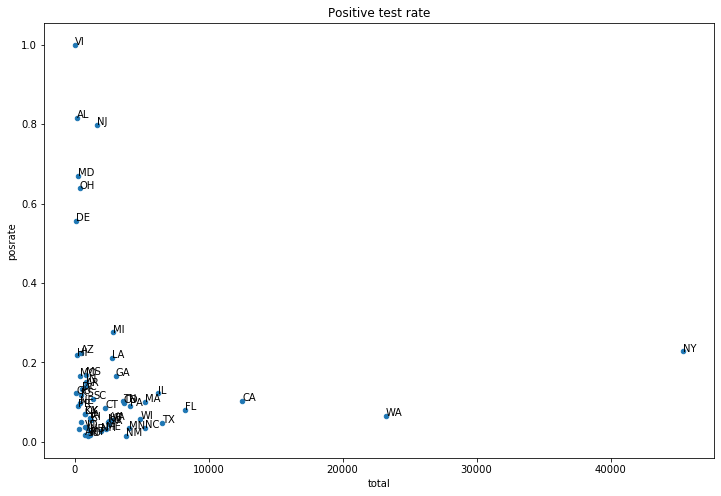

In [26]:
lplot = latest.plot(
    x='total',
    y='posrate',
    kind='scatter',
    title='Positive test rate',
    figsize=(12,8)
)
for i in range(len(latest)):
    try:
        row = latest.loc[i]
        lplot.annotate(row['state'], (row['total'], row['posrate']))
        print(row['state'], row['total'], row['posrate'])
    except KeyError:
        pass